In [1]:
# Step 1: Data Preparation
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

In [2]:
# Load the dataset
data = pd.read_csv('data.csv')


In [3]:
data.head()

,id,email,gender,ssc,hsc,quantitative_ability,logical_reasoning,english_proficiency,automata_score,computer_science_score,internships,backlogs,projects,branch,cgpa,placed_sector
0,1,rwhitmell0@independent.co.uk,0,87.850,79.771,79.005,99.934,71.921,91.437,91.415,NaN,NaN,4,IT,7.53,FinTech
1,2,bgregory1@reference.com,0,53.307,57.952,90.760,68.509,85.333,90.539,94.626,5.0,NaN,1,CS,8.13,Startup
2,3,qmoult2@sciencedaily.com,1,79.973,88.228,87.872,85.311,99.404,71.203,74.121,2.0,NaN,7,EnTC,9.97,Product
3,4,tsiege3@mediafire.com,0,97.934,74.965,81.667,92.008,77.299,71.309,89.063,3.0,NaN,1,IT,9.34,FinTech
4,5,jslowey4@artisteer.com,0,82.761,57.869,72.017,80.981,94.424,94.019,78.379,3.0,NaN,10,CS,6.36,Startup


In [4]:
data = data.fillna(0)

In [5]:
data = data.drop(['id','email'],axis=1)

In [6]:
features_to_split = ['branch']
for feature in features_to_split:
    dummy = pd.get_dummies(data[feature])
    data = pd.concat([data, dummy], axis=1)
    data.drop(feature, axis=1, inplace=True)

In [7]:
data.head()

,gender,ssc,hsc,quantitative_ability,logical_reasoning,english_proficiency,automata_score,computer_science_score,internships,backlogs,projects,cgpa,placed_sector,CS,EnTC,IT
0,0,87.850,79.771,79.005,99.934,71.921,91.437,91.415,0.0,0.0,4,7.53,FinTech,0,0,1
1,0,53.307,57.952,90.760,68.509,85.333,90.539,94.626,5.0,0.0,1,8.13,Startup,1,0,0
2,1,79.973,88.228,87.872,85.311,99.404,71.203,74.121,2.0,0.0,7,9.97,Product,0,1,0
3,0,97.934,74.965,81.667,92.008,77.299,71.309,89.063,3.0,0.0,1,9.34,FinTech,0,0,1
4,0,82.761,57.869,72.017,80.981,94.424,94.019,78.379,3.0,0.0,10,6.36,Startup,1,0,0


In [8]:
# Normalize the numerical features
scaler = MinMaxScaler()
num_cols = ['ssc', 'hsc', 'quantitative_ability', 'logical_reasoning', 'english_proficiency', 'automata_score', 'computer_science_score', 'internships', 'backlogs', 'projects', 'cgpa']
data[num_cols] = scaler.fit_transform(data[num_cols])

In [9]:
data.head()

,gender,ssc,hsc,quantitative_ability,logical_reasoning,english_proficiency,automata_score,computer_science_score,internships,backlogs,projects,cgpa,placed_sector,CS,EnTC,IT
0,0,0.757112,0.595916,0.400561,0.999828,0.197941,0.755511,0.755903,0.0,0.0,0.333333,0.380952,FinTech,0,0,1
1,0,0.063658,0.159143,0.736937,0.100378,0.581524,0.729836,0.847812,1.0,0.0,0.000000,0.531328,Startup,1,0,0
2,1,0.598980,0.765209,0.654295,0.581287,0.983955,0.176984,0.260898,0.4,0.0,0.666667,0.992481,Product,0,1,0
3,0,0.959549,0.499710,0.476736,0.772969,0.351752,0.180014,0.688582,0.6,0.0,0.000000,0.834586,FinTech,0,0,1
4,0,0.654950,0.157482,0.200595,0.457353,0.841527,0.829335,0.382775,0.6,0.0,1.000000,0.087719,Startup,1,0,0


<ipython-input-10-d964c804327d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


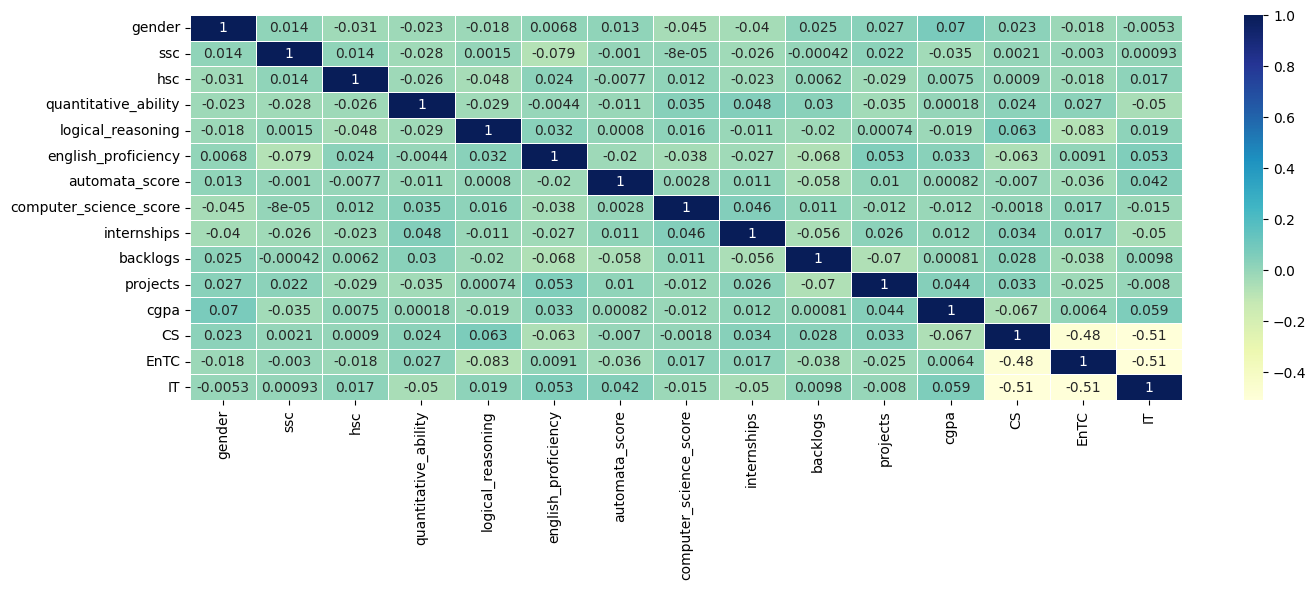

In [10]:
corr_matrix = data.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr_matrix, annot=True,linewidths=.5, cmap='YlGnBu')
plt.show()

In [11]:
# Step 3: Model Selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
# Split the data into training and testing sets
X = data.drop('placed_sector', axis=1)
y = data['placed_sector']

In [13]:
# Use Logistic Regression as the classification algorithm
clf = LogisticRegression()

In [14]:
# Create the RFE model and select the top 5 features
rfe = RFE(estimator=clf, n_features_to_select=5, step=1)
rfe.fit(X, y)

# Print the selected features
print('Selected Features:')
for i in range(X.shape[1]):
    if rfe.support_[i]:
        print(X.columns[i])

Selected Features:
ssc
logical_reasoning
english_proficiency
backlogs
cgpa


In [15]:
X_new = rfe.transform(X)  # Select only the selected features
selected_features = X.columns[rfe.get_support(indices=True)]  # Get the names of the selected features
print("Selected features:", selected_features)

Selected features: Index(['ssc', 'logical_reasoning', 'english_proficiency', 'backlogs', 'cgpa'], dtype='object')


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [17]:
# Step 4: Model Training
# clf.fit(X_train, y_train)
clf.fit(X_train,y_train)

LogisticRegression()

In [18]:
print(X_train.shape,X_test.shape,X.shape)

(800, 5) (200, 5) (1000, 15)


In [19]:
# Step 5: Model Evaluation
# Evaluate the performance of the model using metrics like accuracy, precision, recall, F1-score, and confusion matrix.
y_pred = clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score}")

Accuracy Score: 0.23


In [20]:
y_pred_proba = clf.predict_proba(X_test)

#print(y_pred_proba)

In [21]:
new_data = pd.read_csv('newdata.csv')
new_data[num_cols] = scaler.transform(new_data[num_cols])

In [22]:
new_data.head()

,gender,ssc,hsc,quantitative_ability,logical_reasoning,english_proficiency,automata_score,computer_science_score,internships,backlogs,projects,cgpa,CS,EnTC,IT
0,0,0.868528,0.700591,0.572111,0.858607,0.715001,0.943159,0.88714,0.4,0.0,0.333333,0.899749,0,0,1
1,1,0.378696,0.380302,0.114262,0.114431,0.114400,0.113996,0.11432,0.4,0.4,0.111111,0.498747,1,0,0


In [23]:
index = pd.Index(['ssc', 'logical_reasoning', 'english_proficiency', 'backlogs', 'cgpa'], dtype='object')
selected_features_test = index.tolist()
new_data = new_data[selected_features_test]
print(new_data)

        ssc  logical_reasoning  english_proficiency  backlogs      cgpa
0  0.868528           0.858607             0.715001       0.0  0.899749
1  0.378696           0.114431             0.114400       0.4  0.498747


In [24]:
new_predictions = clf.predict(new_data)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [25]:
print(new_predictions)

['Startup' 'Product']


In [26]:
new_predictions = clf.predict_proba(new_data)
print(new_predictions)

[[0.21354943 0.24841064 0.19470533 0.3433346 ]
 [0.25261883 0.28462933 0.26857839 0.19417345]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [33]:
# Create a dictionary to store the predicted probabilities for each Placed Sector category
output = []
for i in range(len(new_predictions)):
    row_dict = {}
    for j, category in enumerate(clf.classes_):
        row_dict[category] = new_predictions[i][j]
    output.append(row_dict)
print(output)

[{'FinTech': 0.213549434293882, 'Product': 0.24841063752053436, 'Service': 0.19470533246316313, 'Startup': 0.3433345957224206}, {'FinTech': 0.2526188270228873, 'Product': 0.2846293331940034, 'Service': 0.2685783898463338, 'Startup': 0.1941734499367754}]


In [ ]:
##################
from sklearn.ensemble import RandomForestClassifier
# Define the Placed Sector values
placed_sectors = ['Service', 'Product', 'FinTech', 'Startup']

# Iterate over each Placed Sector
for sector in placed_sectors:
    print(f'Feature importances for {sector} sector:')
    
    # Split the data into features and target
    X = data.drop('placed_sector', axis=1)
    y = (data['placed_sector'] == sector).astype(int) # Create binary target for the current sector

    # Train a Random Forest classifier
    rf = RandomForestClassifier()
    rf.fit(X, y)

    # Get the feature importances
    importances = pd.Series(rf.feature_importances_, index=X.columns)

    # Sort the importances in descending order
    importances_sorted = importances.sort_values(ascending=False)

    # Print the feature importances
    print(importances_sorted)